In [2]:
# Investigate the relationship between probability to win and lengths behind
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as m
from helper import *

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

main = pd.read_pickle("../Data/main_no_outliers.df")


import scipy.optimize as opt
def expModel(x, *para):
    result = para[0]*m.e**(para[1]*x + para[2]) + para[3]
    return result
def expFit(x, y):
    p0=(1, -2, 2, 0.2)
    fitParams,fitCovariance = opt.curve_fit(expModel,x,y,p0)
    return fitParams

# Using market odds to determine lengths behind:

KNN Accuracy: 4.006
R^2 Value: 0.187
KNN Accuracy: 4.139
R^2 Value: 0.174
KNN Accuracy: 4.106
R^2 Value: 0.181
KNN Accuracy: 4.050
R^2 Value: 0.193
KNN Accuracy: 4.092
R^2 Value: 0.186
K: 100, Error: 8.13860519744438


Text(0.5,0,'Market Probability to Win')

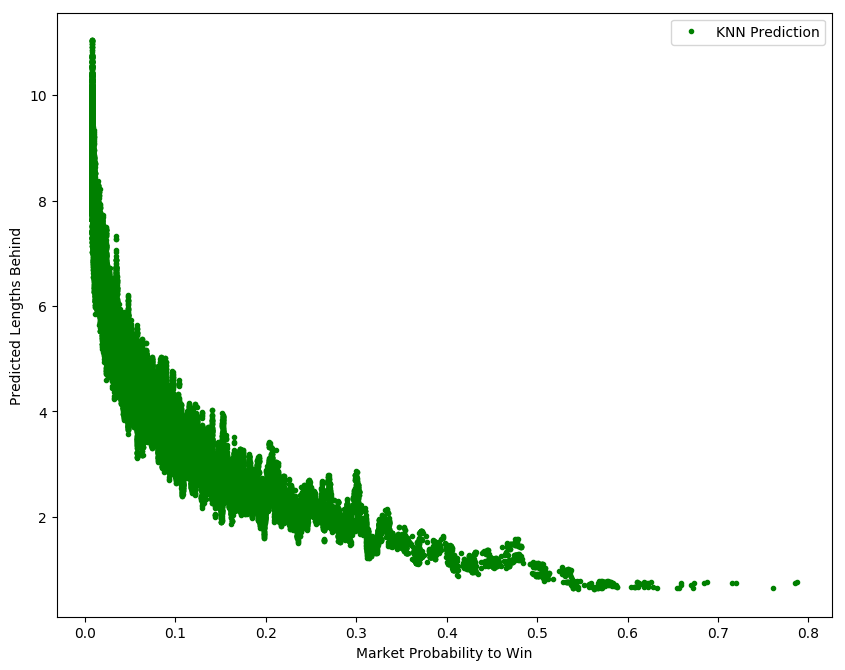

In [8]:
# Perform KNN on LBW to predict probabilies
k = 100

x = []
y = []
logy = []
knny = []
for training, testing in getCrossVal(main, 5):
    knn = KNeighborsRegressor(k)

    X_train = training[["probability"]] 
    y_train = training["lengths_behind"]
    X_test = testing[["probability"]]
    y_test = testing["lengths_behind"]

    knn.fit(X_train, y_train)

    knnPreds = knn.predict(X_test)

    # Accuracy
    RMSE = mean_squared_error(knnPreds, y_test, squared=False)
    errSum += RMSE
    Rsq = r2_score(y_test, knnPreds)
    print("KNN Accuracy: {:.3f}".format(RMSE))
    print("R^2 Value: {:.3f}".format(Rsq))

    y.extend(y_test)
    x.extend(X_test.values)
    knny.extend(knnPreds)

print("K: {}, Error: {}".format(k, errSum/5.))
# Plot what we have so far x-odds, y-LBW
plt.figure(figsize=(10,8), dpi=100)
#plt.plot(x, y, "r.", label="Actual Lenghts Behind")
plt.plot(x, knny, "g.", label="KNN Prediction")
plt.legend()
plt.ylabel("Predicted Lengths Behind")
plt.xlabel("Market Probability to Win")

In [12]:
# p1 = expFit(np.array(x), np.array(knny).reshape(-1,1))
# print("R^2 Value: {:.3}".format(r2_score([expModel(i, *p1) for i in main["probability"]], main["lengths_behind"])))
# xLin = np.linspace(min(x), max(x), 100)
# plt.plot(xLin, expModel(xLin, *p1), ".b", label="Fit")

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

# Using lengths behind to produce winning odds:

KNN Accuracy: 0.072
KNN Accuracy: 0.075
KNN Accuracy: 0.074
KNN Accuracy: 0.076
KNN Accuracy: 0.076
KNN Accuracy: 0.074
KNN Accuracy: 0.074
KNN Accuracy: 0.074
KNN Accuracy: 0.075
KNN Accuracy: 0.075
KNN Accuracy: 0.076
KNN Accuracy: 0.076
KNN Accuracy: 0.075
KNN Accuracy: 0.074
KNN Accuracy: 0.076
KNN Accuracy: 0.075
KNN Accuracy: 0.074
KNN Accuracy: 0.074
KNN Accuracy: 0.073
KNN Accuracy: 0.074


Text(0.5,0,'LBW')

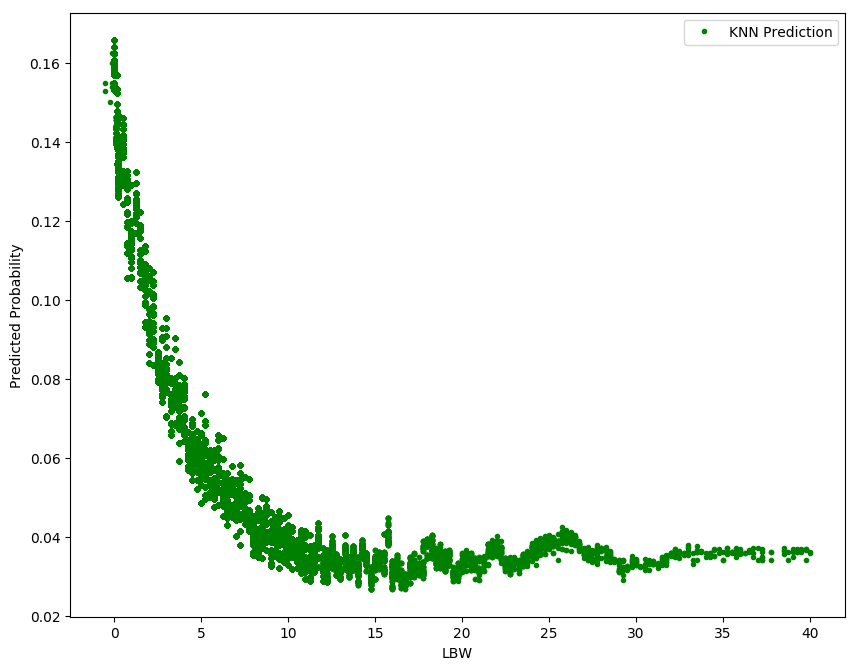

In [9]:
# Perform KNN on LBW to predict probabilies
k = 150
x = []
y = []
knny = []
for training, testing in getCrossVal(main, 20):
    knn = KNeighborsRegressor(k)
    
    X_train = training[["lengths_behind"]] 
    y_train = training["probability"]
    X_test = testing[["lengths_behind"]]
    y_test = testing["probability"]
    
    knn.fit(X_train, y_train)
    
    preds = knn.predict(X_test)
    
    # Accuracy
    RMSE = mean_squared_error(preds, y_test, squared=False)
    print("KNN Accuracy: {:.3f}".format(RMSE))
    
    y.extend(y_test.values)
    x.extend(X_test.values)
    knny.extend(preds)
    
# Plot what we have so far x-odds, y-LBW
x = [i[0] for i in x]
#knny = [i[0] for i in knny]
plt.figure(figsize=(10,8), dpi=100)
plt.plot(x, knny, "g.", label="KNN Prediction")
plt.legend()
plt.ylabel("Predicted Probability")
plt.xlabel("LBW")

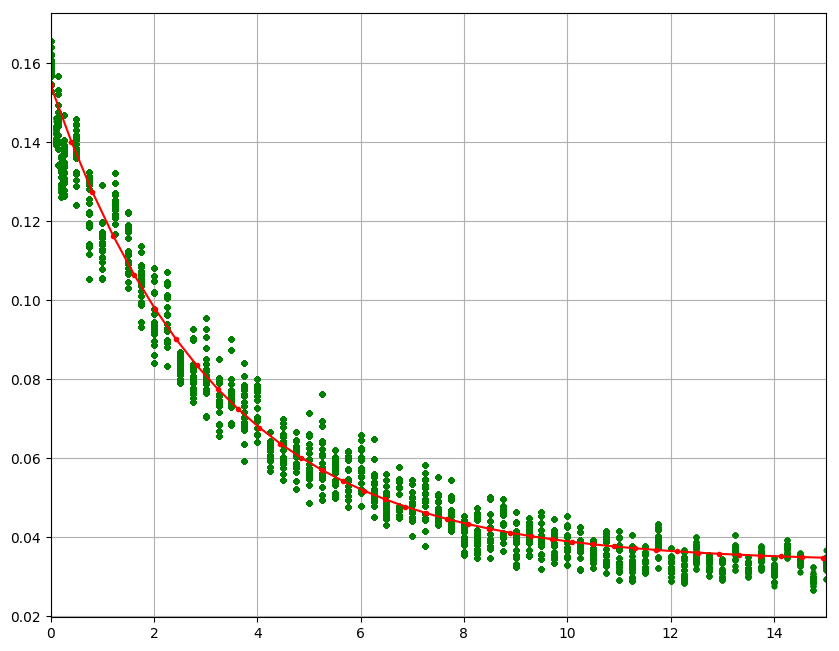

In [11]:
p = expFit(np.array(x), np.array(knny))
plt.figure(figsize=(10,8), dpi=100)
xLin = np.linspace(0, 40, 100)
plt.plot(x, knny, "g.", label="KNN Prediction")
plt.plot(xLin, [expModel(i, *p) for i in xLin], "r.-")
plt.xlim(0, 15)
plt.grid()

In [13]:
print("{}*e^({}x+{}) + {}".format(p[0], p[1], p[2], p[3]))
print(p[0], p[1], p[2], p[3])

0.026275483851321047*e^(-0.3131244740778995x+1.5252429348553294) + 0.03369027320819763
0.026275483851321047 -0.3131244740778995 1.5252429348553294 0.03369027320819763
